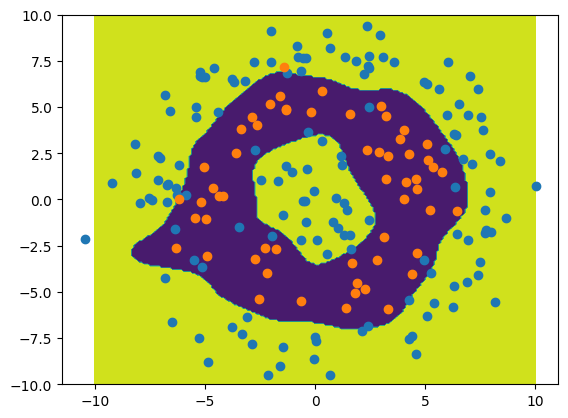

In [22]:
import matplotlib.pyplot as plt
import tools as tl
import numpy as np
from sklearn.neighbors import KernelDensity

X, y = tl.gen_circular_distribution(200)

X1 = X[y==0,:]
X2 = X[y==1,:]

Xgrid, x1line, x2line = tl.gen_sample_grid(200,200,10)

band = 1
kde_x1 = KernelDensity(kernel='gaussian',bandwidth=band).fit(X1)
kde_x2 = KernelDensity(kernel='gaussian',bandwidth=band).fit(X2)

prob_x1 = np.reshape(np.exp(kde_x1.score_samples(Xgrid)),[200,200])
prob_x2 = np.reshape(np.exp(kde_x2.score_samples(Xgrid)),[200,200])

prob = np.zeros((200,200))
prob[prob_x1>prob_x2] = 1

plt.contourf(x1line,x2line,prob)
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])

